# Edge Detection - The Visual Boundary Intelligence

**Course:** 21CSE558T - Deep Neural Network Architectures  
**Week 7, Day 4** | **Module 3:** Image Processing & DNNs  
**Instructor:** Prof. Ramesh Babu | **Date:** September 30, 2025

---

## 🎯 Learning Path Overview

This interactive notebook takes you from basic concepts to advanced edge detection techniques:

1. **Setup** → Get libraries and test images ready
2. **Computer's Challenge** → Show the pixel problem (numbers vs boundaries)
3. **Gradients (Captain Mike)** → Build intuition from 1D to 2D, manual to Sobel
4. **Canny Protocol** → 4-stage systematic approach with visual proof
5. **Advanced (Laplacian)** → Second derivatives and when to use them
6. **Multi-Scale** → Image pyramids for robust detection
7. **Real Applications** → Medical, automotive, manufacturing with code
8. **Interactive Challenges** → Students experiment and compete
9. **CNN Bridge** → Connect manual filters to deep learning
10. **Assessment Prep** → Unit Test 2 study guide
11. **Summary** → Key takeaways and Tutorial T7 assignment

---

## 💡 Key Learning Objectives

By the end of this notebook, you will:

✅ Understand **why edge detection matters** for computer vision  
✅ Master **gradient concepts** through intuitive analogies  
✅ Implement **Sobel and Canny edge detectors** in OpenCV  
✅ Compare **different edge detection methods** and know when to use each  
✅ Apply edge detection to **real-world problems**  
✅ Bridge classical edge detection to **modern deep learning (CNNs)**  

---

## 🚨 Course Context

**Where We Are:** Week 7 of 15 (47% through course)  
**Module Progress:** Transitioning from neural network foundations → computer vision applications  
**Next Assessment:** Unit Test 2 (October 31) - Modules 3 & 4  
**Connection to Future:** This prepares you for CNNs (Week 10) and Object Detection (Week 13)  

---

**Let's begin our journey into teaching computers to see boundaries!** 🔍

---

# SECTION 0: Setup & Environment Preparation

Let's get everything ready for our edge detection investigation!

## Cell 0.1: Import Essential Libraries

We'll need:
- **OpenCV (cv2):** For image processing and edge detection
- **NumPy:** For numerical operations and array manipulation
- **Matplotlib:** For visualizing our results

In [1]:
# Import essential libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

# Configure matplotlib for better visualizations
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.size'] = 10
%matplotlib inline

print("✅ Libraries imported successfully!")
print(f"📦 OpenCV Version: {cv2.__version__}")
print(f"📦 NumPy Version: {np.__version__}")
print("\n🎉 Ready to start edge detection!")

✅ Libraries imported successfully!
📦 OpenCV Version: 4.12.0
📦 NumPy Version: 2.0.2

🎉 Ready to start edge detection!


## Cell 0.2: Helper Visualization Functions

Let's create useful functions to display our results beautifully!

In [2]:
def show_comparison(images, titles, cmaps=None, figsize=(15, 5)):
    """
    Display multiple images side-by-side for comparison

    Parameters:
    - images: List of images to display
    - titles: List of titles for each image
    - cmaps: List of colormaps (default: 'gray' for all)
    - figsize: Figure size tuple
    """
    n = len(images)
    if cmaps is None:
        cmaps = ['gray'] * n

    fig, axes = plt.subplots(1, n, figsize=figsize)
    if n == 1:
        axes = [axes]

    for i, (img, title, cmap) in enumerate(zip(images, titles, cmaps)):
        axes[i].imshow(img, cmap=cmap)
        axes[i].set_title(title, fontsize=12, fontweight='bold')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()


def show_gradient_analysis(image, gx, gy, magnitude):
    """
    Display complete gradient analysis in a 2x2 grid
    """
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Original image
    axes[0, 0].imshow(image, cmap='gray')
    axes[0, 0].set_title('Original Image', fontsize=12, fontweight='bold')
    axes[0, 0].axis('off')

    # Gradient X (vertical edges)
    axes[0, 1].imshow(np.abs(gx), cmap='hot')
    axes[0, 1].set_title('Gradient X (Vertical Edges)', fontsize=12, fontweight='bold')
    axes[0, 1].axis('off')

    # Gradient Y (horizontal edges)
    axes[1, 0].imshow(np.abs(gy), cmap='hot')
    axes[1, 0].set_title('Gradient Y (Horizontal Edges)', fontsize=12, fontweight='bold')
    axes[1, 0].axis('off')

    # Combined magnitude
    axes[1, 1].imshow(magnitude, cmap='hot')
    axes[1, 1].set_title('Combined Magnitude (All Edges)', fontsize=12, fontweight='bold')
    axes[1, 1].axis('off')

    plt.tight_layout()
    plt.show()


def print_section_header(section_num, title):
    """
    Print a nice section header
    """
    print("\n" + "="*80)
    print(f"SECTION {section_num}: {title}")
    print("="*80 + "\n")


print("✅ Visualization helper functions created!")
print("📊 Functions available:")
print("   - show_comparison(): Display multiple images side-by-side")
print("   - show_gradient_analysis(): Show complete gradient breakdown")
print("   - print_section_header(): Format section titles nicely")

✅ Visualization helper functions created!
📊 Functions available:
   - show_comparison(): Display multiple images side-by-side
   - show_gradient_analysis(): Show complete gradient breakdown
   - print_section_header(): Format section titles nicely


## Cell 0.3: Create Test Images

We'll create several test images with different characteristics:  
- **Simple shapes** (easy to understand)
- **Geometric patterns** (clear boundaries)
- **Real-world scenarios** (complex edges)

✅ Test image library created!

📸 Available test images:
   - simple_square: 200x200 pixels
   - circle: 200x200 pixels
   - multi_shapes: 400x300 pixels
   - gradient_ramp: 400x200 pixels

👁️  Preview of Test Images:



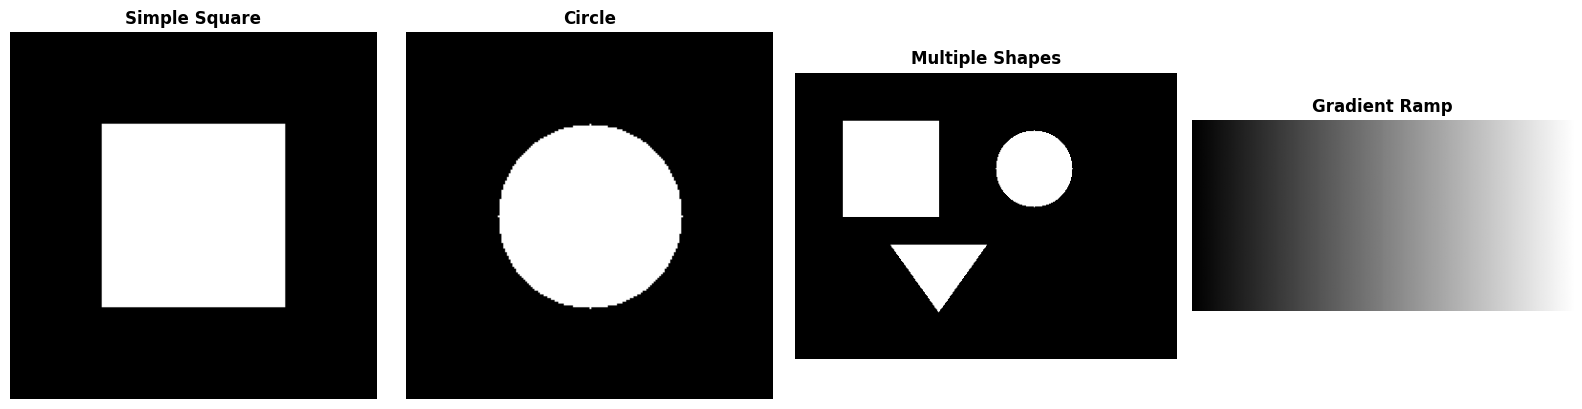

In [3]:
def create_simple_square():
    """Create a simple white square on black background - Detective Sarah's first case!"""
    image = np.zeros((200, 200), dtype=np.uint8)
    image[50:150, 50:150] = 255
    return image


def create_circle_image():
    """Create a white circle on black background"""
    image = np.zeros((200, 200), dtype=np.uint8)
    cv2.circle(image, (100, 100), 50, 255, -1)
    return image


def create_multi_shapes():
    """Create multiple shapes - more complex case"""
    image = np.zeros((300, 400), dtype=np.uint8)
    # Rectangle
    cv2.rectangle(image, (50, 50), (150, 150), 255, -1)
    # Circle
    cv2.circle(image, (250, 100), 40, 255, -1)
    # Triangle
    pts = np.array([[150, 250], [100, 180], [200, 180]], np.int32)
    cv2.fillPoly(image, [pts], 255)
    return image


def create_gradient_ramp():
    """Create a gradient for understanding intensity changes"""
    image = np.zeros((200, 400), dtype=np.uint8)
    for i in range(400):
        intensity = int(255 * i / 400)
        image[:, i] = intensity
    return image


def add_noise_to_image(image, noise_type='gaussian', intensity=25):
    """Add noise to an image to demonstrate noise handling"""
    if noise_type == 'gaussian':
        noise = np.random.normal(0, intensity, image.shape).astype(np.uint8)
        noisy = cv2.add(image, noise)
    elif noise_type == 'salt_pepper':
        noisy = image.copy()
        # Salt
        num_salt = np.ceil(intensity * image.size * 0.01)
        coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
        noisy[coords[0], coords[1]] = 255
        # Pepper
        num_pepper = np.ceil(intensity * image.size * 0.01)
        coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
        noisy[coords[0], coords[1]] = 0
    return noisy


# Create our test image library
test_images = {
    'simple_square': create_simple_square(),
    'circle': create_circle_image(),
    'multi_shapes': create_multi_shapes(),
    'gradient_ramp': create_gradient_ramp(),
}

# Display our test library
print("✅ Test image library created!\n")
print("📸 Available test images:")
for name, img in test_images.items():
    print(f"   - {name}: {img.shape[1]}x{img.shape[0]} pixels")

# Show the test images
print("\n👁️  Preview of Test Images:\n")
show_comparison(
    [test_images['simple_square'], test_images['circle'],
     test_images['multi_shapes'], test_images['gradient_ramp']],
    ['Simple Square', 'Circle', 'Multiple Shapes', 'Gradient Ramp'],
    figsize=(16, 4)
)

## Cell 0.4: Load Real-World Image (Optional)

If you have your own image, load it here! Otherwise, we'll work with our synthetic test images.

In [4]:
# Option 1: Load your own image (update the path)
# YOUR_IMAGE_PATH = 'path/to/your/image.jpg'
# try:
#     user_image = cv2.imread(YOUR_IMAGE_PATH, cv2.IMREAD_GRAYSCALE)
#     if user_image is not None:
#         test_images['user_image'] = user_image
#         print(f"✅ Your image loaded: {user_image.shape[1]}x{user_image.shape[0]} pixels")
#         plt.figure(figsize=(8, 6))
#         plt.imshow(user_image, cmap='gray')
#         plt.title('Your Loaded Image')
#         plt.axis('off')
#         plt.show()
#     else:
#         print("❌ Could not load image. Check the path.")
# except:
#     print("❌ Error loading image. Using test images instead.")

# Option 2: Use OpenCV sample images (if available)
print("📝 To use your own image:")
print("   1. Uncomment the code above")
print("   2. Update YOUR_IMAGE_PATH with your image path")
print("   3. Run this cell again")
print("\n✅ For now, we'll use our test images to learn the concepts!")

📝 To use your own image:
   1. Uncomment the code above
   2. Update YOUR_IMAGE_PATH with your image path
   3. Run this cell again

✅ For now, we'll use our test images to learn the concepts!


---

# SECTION 1: The Computer's Challenge - Seeing vs Understanding

## 🔍 Detective Sarah's Story

Imagine **Detective Sarah** arriving at a museum burglary. Her eyes instantly see:
- Wall boundaries
- Painting frames
- Scattered objects
- Evidence locations

**Sarah's insight:** *"I'm not looking AT objects - I'm looking at the BOUNDARIES between objects!"*

But computers? They see **just numbers**. Let's see the problem...

## Cell 1.1: What Computers Actually See


SECTION 1: The Computer's Challenge

👁️  What WE see: A clear boundary between black and white

🤖 What the COMPUTER sees (raw pixel values):

[[  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 255 255 255 255 255]
 [  0   0   0   0   0 255 255 255 255 255]
 [  0   0   0   0   0 255 255 255 255 255]
 [  0   0   0   0   0 255 255 255 255 255]
 [  0   0   0   0   0 255 255 255 255 255]]

💡 The Challenge: How do we teach the computer to find that boundary?
   Answer: EDGE DETECTION! 🎯


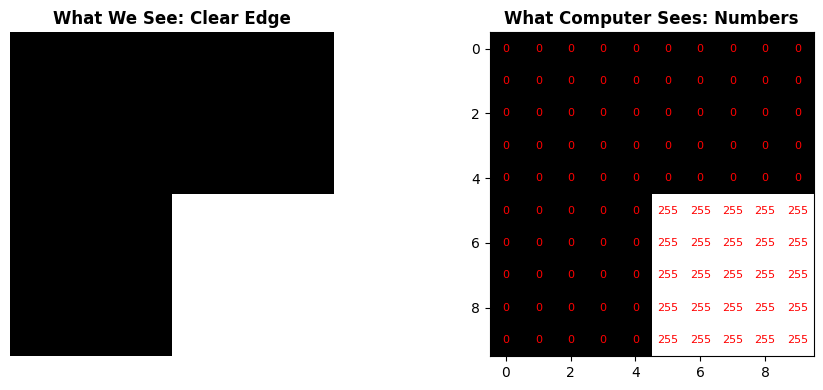

In [5]:
print_section_header(1, "The Computer's Challenge")

# Take a small patch from our simple square
image = test_images['simple_square']
patch = image[45:55, 45:55]  # 10x10 patch across the edge

print("👁️  What WE see: A clear boundary between black and white\n")
print("🤖 What the COMPUTER sees (raw pixel values):\n")
print(patch)
print("\n💡 The Challenge: How do we teach the computer to find that boundary?")
print("   Answer: EDGE DETECTION! 🎯")

# Visualize the patch
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Show the patch
axes[0].imshow(patch, cmap='gray')
axes[0].set_title('What We See: Clear Edge', fontsize=12, fontweight='bold')
axes[0].axis('off')

# Show as heatmap with values
im = axes[1].imshow(patch, cmap='gray')
axes[1].set_title('What Computer Sees: Numbers', fontsize=12, fontweight='bold')
for i in range(patch.shape[0]):
    for j in range(patch.shape[1]):
        text = axes[1].text(j, i, int(patch[i, j]),
                           ha="center", va="center", color="red", fontsize=8)

plt.tight_layout()
plt.show()

## Cell 1.2: Pixel Intensity as a 3D Mountain

**Captain Mike's Mountain Analogy:**  
Think of pixel brightness as mountain height:
- **Bright pixels** = High peaks ⛰️
- **Dark pixels** = Deep valleys 🏔️
- **Sudden changes** = Steep cliffs (EDGES!) 🎯

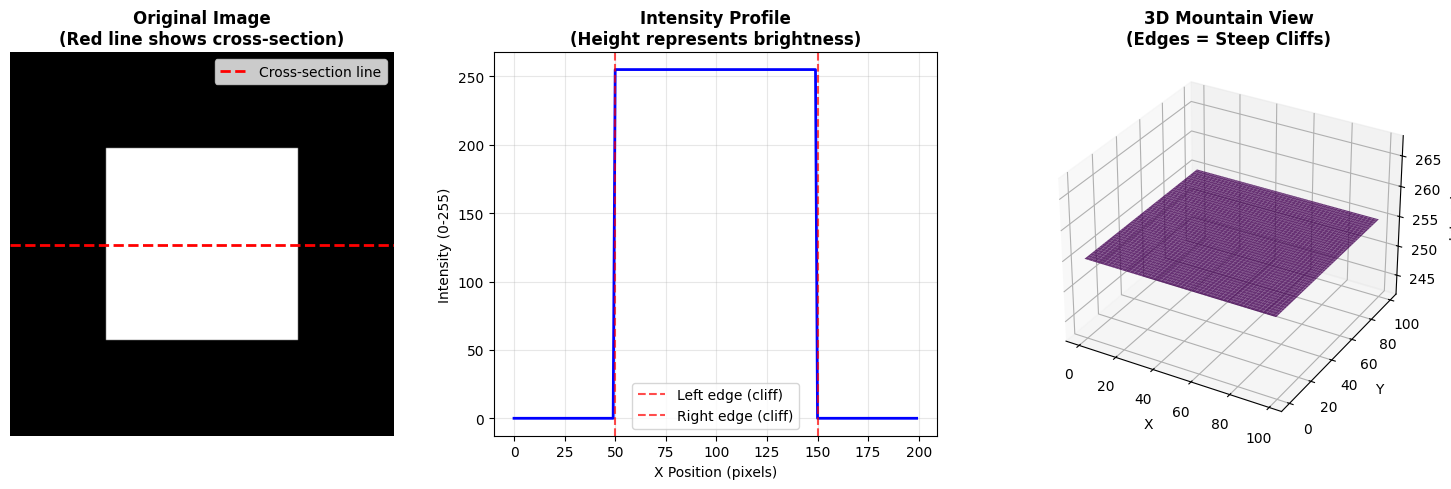


🏔️  Mountain Analogy Explained:
   - Flat areas (black or white) = Gentle terrain (NO edges)
   - Steep cliffs (sudden intensity change) = EDGES!
   - Our goal: Find these 'cliffs' automatically


In [6]:
# Create a 3D visualization of intensity as height
image = test_images['simple_square']

# Take a cross-section to visualize
cross_section = image[100, :]  # Horizontal line through middle

fig = plt.figure(figsize=(15, 5))

# Original image
ax1 = fig.add_subplot(131)
ax1.imshow(image, cmap='gray')
ax1.axhline(y=100, color='red', linestyle='--', linewidth=2, label='Cross-section line')
ax1.set_title('Original Image\n(Red line shows cross-section)', fontsize=12, fontweight='bold')
ax1.legend()
ax1.axis('off')

# 1D intensity profile
ax2 = fig.add_subplot(132)
ax2.plot(cross_section, linewidth=2, color='blue')
ax2.set_title('Intensity Profile\n(Height represents brightness)', fontsize=12, fontweight='bold')
ax2.set_xlabel('X Position (pixels)')
ax2.set_ylabel('Intensity (0-255)')
ax2.grid(True, alpha=0.3)
ax2.axvline(x=50, color='red', linestyle='--', alpha=0.7, label='Left edge (cliff)')
ax2.axvline(x=150, color='red', linestyle='--', alpha=0.7, label='Right edge (cliff)')
ax2.legend()

# 3D surface plot (small region for clarity)
ax3 = fig.add_subplot(133, projection='3d')
x = np.arange(0, 100, 1)
y = np.arange(0, 100, 1)
X, Y = np.meshgrid(x, y)
Z = image[50:150, 50:150]

surf = ax3.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax3.set_title('3D Mountain View\n(Edges = Steep Cliffs)', fontsize=12, fontweight='bold')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Intensity')

plt.tight_layout()
plt.show()

print("\n🏔️  Mountain Analogy Explained:")
print("   - Flat areas (black or white) = Gentle terrain (NO edges)")
print("   - Steep cliffs (sudden intensity change) = EDGES!")
print("   - Our goal: Find these 'cliffs' automatically")

## Cell 1.3: Real-World Applications - Why Edge Detection Matters

In [7]:
print("\n🌍 Real-World Applications of Edge Detection:\n")

applications = [
    ("🏥 Medical Imaging", "Finding tumor boundaries in X-rays and MRIs"),
    ("🚗 Autonomous Vehicles", "Detecting road edges and lane markings"),
    ("🏭 Manufacturing", "Quality control - finding defects and measuring parts"),
    ("👤 Face Recognition", "Identifying facial features and boundaries"),
    ("📱 Document Scanning", "Detecting page edges for perspective correction"),
    ("🎮 Augmented Reality", "Tracking objects and overlaying digital content"),
    ("🔬 Microscopy", "Analyzing cell boundaries and structures"),
    ("🛰️ Satellite Imagery", "Detecting roads, buildings, and geographic features")
]

for i, (domain, application) in enumerate(applications, 1):
    print(f"{i}. {domain}")
    print(f"   → {application}\n")

print("\n💡 Key Insight: Edge detection is the FOUNDATION of computer vision!")
print("   Without edges, computers can't understand images.")


🌍 Real-World Applications of Edge Detection:

1. 🏥 Medical Imaging
   → Finding tumor boundaries in X-rays and MRIs

2. 🚗 Autonomous Vehicles
   → Detecting road edges and lane markings

3. 🏭 Manufacturing
   → Quality control - finding defects and measuring parts

4. 👤 Face Recognition
   → Identifying facial features and boundaries

5. 📱 Document Scanning
   → Detecting page edges for perspective correction

6. 🎮 Augmented Reality
   → Tracking objects and overlaying digital content

7. 🔬 Microscopy
   → Analyzing cell boundaries and structures

8. 🛰️ Satellite Imagery
   → Detecting roads, buildings, and geographic features


💡 Key Insight: Edge detection is the FOUNDATION of computer vision!
   Without edges, computers can't understand images.


## Cell 1.4: Detective's Toolkit Preview

In [8]:
print("\n🕵️ Detective Sarah's Investigation Methods:\n")
print("┌─────────────────────────────────────────────────────────────┐")
print("│ Method 1: THE QUICK SCAN (Sobel Method)                    │")
print("├─────────────────────────────────────────────────────────────┤")
print("│ • Fast horizontal and vertical scans                        │")
print("│ • Good for simple cases                                     │")
print("│ • May miss subtle edges                                     │")
print("│ Speed: ⚡⚡⚡ | Quality: ⭐⭐                              │")
print("└─────────────────────────────────────────────────────────────┘")
print("")
print("┌─────────────────────────────────────────────────────────────┐")
print("│ Method 2: THE THOROUGH INVESTIGATION (Canny Method)         │")
print("├─────────────────────────────────────────────────────────────┤")
print("│ • 4-stage systematic protocol                               │")
print("│ • Clean scene → Find evidence → Eliminate false leads      │")
print("│ • Connects related evidence                                 │")
print("│ Speed: ⚡⚡ | Quality: ⭐⭐⭐⭐⭐                         │")
print("└─────────────────────────────────────────────────────────────┘")
print("")
print("┌─────────────────────────────────────────────────────────────┐")
print("│ Method 3: THE AERIAL VIEW (Laplacian Method)                │")
print("├─────────────────────────────────────────────────────────────┤")
print("│ • Single-pass detection                                     │")
print("│ • Finds edges in all directions                             │")
print("│ • Sensitive to noise                                        │")
print("│ Speed: ⚡⚡⚡ | Quality: ⭐⭐⭐                            │")
print("└─────────────────────────────────────────────────────────────┘")
print("\n📚 We'll learn each method step-by-step in this notebook!")


🕵️ Detective Sarah's Investigation Methods:

┌─────────────────────────────────────────────────────────────┐
│ Method 1: THE QUICK SCAN (Sobel Method)                    │
├─────────────────────────────────────────────────────────────┤
│ • Fast horizontal and vertical scans                        │
│ • Good for simple cases                                     │
│ • May miss subtle edges                                     │
│ Speed: ⚡⚡⚡ | Quality: ⭐⭐                              │
└─────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────┐
│ Method 2: THE THOROUGH INVESTIGATION (Canny Method)         │
├─────────────────────────────────────────────────────────────┤
│ • 4-stage systematic protocol                               │
│ • Clean scene → Find evidence → Eliminate false leads      │
│ • Connects related evidence                                 │
│ Speed: ⚡⚡ | Quality: ⭐⭐⭐⭐⭐                         │
└─────────

---

# SECTION 2: Captain Mike's Mountain Survey - Understanding Gradients

## ⛰️ The Mountain Rescue Story

**Meet Captain Mike**, expert mountain rescue leader on Mount DataPeak.

**The Problem:** Hikers lost in dense fog. Can't see cliffs directly.

**Mike's Solution:** *"In fog, you can't SEE the cliffs - but you can FEEL when the ground suddenly drops!"*

**Mike's Two-Team Strategy:**
- **Team Alpha:** East-West scouts measure horizontal steepness
- **Team Beta:** North-South scouts measure vertical steepness
- **Combined Intel:** Complete danger map of all cliffs!

## Cell 2.1: Understanding Gradients - 1D Example


SECTION 2: Understanding Gradients (Captain Mike's Mountain Survey)



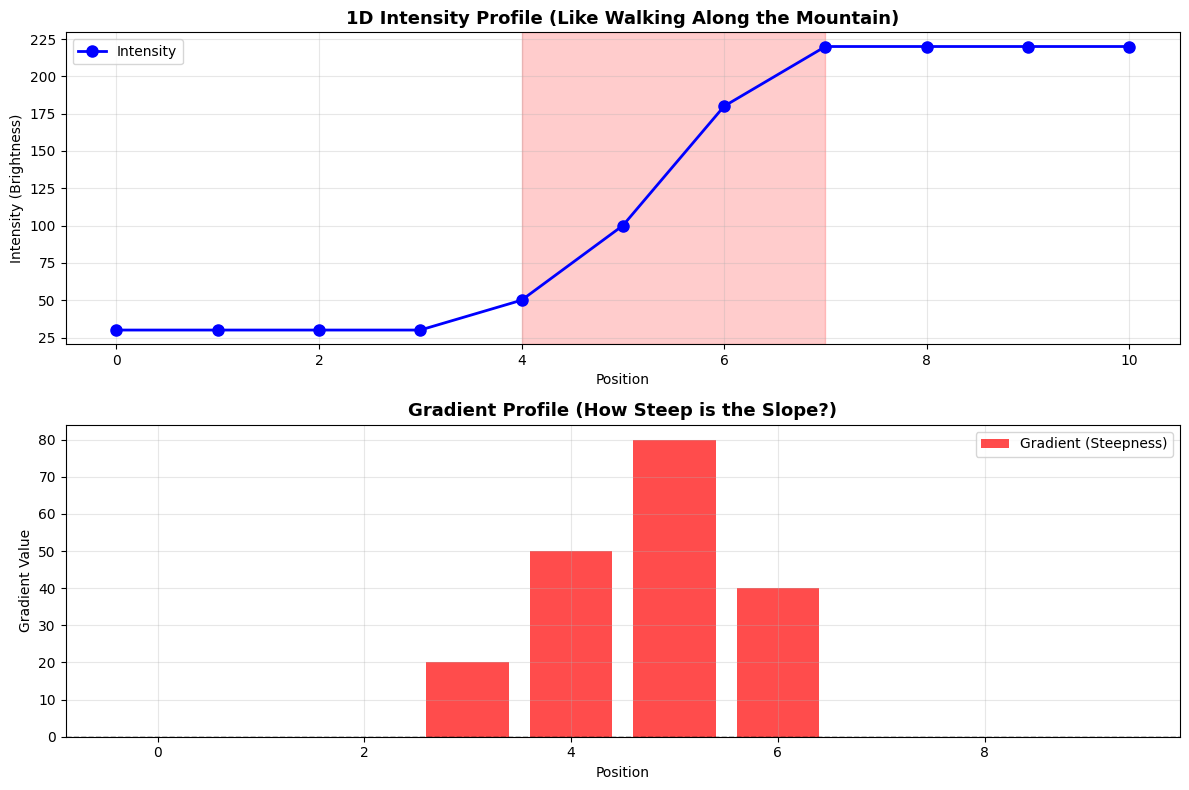


📊 Gradient Analysis:
   Original values: [ 30  30  30  30  50 100 180 220 220 220 220]
   Gradient values: [ 0  0  0 20 50 80 40  0  0  0]

💡 Key Insight:
   - Gradient = How much intensity CHANGES between adjacent pixels
   - Large gradient = Steep slope = EDGE!
   - Small gradient = Flat area = NO edge

🏔️ Mountain Analogy:
   - Flat regions (positions 0-3, 7-10) → Small gradient
   - Steep cliff (positions 4-7) → Large gradient = EDGE DETECTED!


In [9]:
print_section_header(2, "Understanding Gradients (Captain Mike's Mountain Survey)")

# Create a simple 1D intensity profile with a clear edge
intensity_profile = np.array([30, 30, 30, 30, 50, 100, 180, 220, 220, 220, 220])
positions = np.arange(len(intensity_profile))

# Calculate gradient manually (difference between consecutive values)
gradient_profile = np.diff(intensity_profile)

fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Plot intensity profile
axes[0].plot(positions, intensity_profile, 'bo-', linewidth=2, markersize=8, label='Intensity')
axes[0].set_title('1D Intensity Profile (Like Walking Along the Mountain)',
                  fontsize=13, fontweight='bold')
axes[0].set_xlabel('Position')
axes[0].set_ylabel('Intensity (Brightness)')
axes[0].grid(True, alpha=0.3)
axes[0].legend()
axes[0].axvspan(4, 7, alpha=0.2, color='red', label='Edge region')

# Plot gradient (steepness)
axes[1].bar(positions[:-1], gradient_profile, color='red', alpha=0.7, label='Gradient (Steepness)')
axes[1].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[1].set_title('Gradient Profile (How Steep is the Slope?)',
                  fontsize=13, fontweight='bold')
axes[1].set_xlabel('Position')
axes[1].set_ylabel('Gradient Value')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()

print("\n📊 Gradient Analysis:")
print(f"   Original values: {intensity_profile}")
print(f"   Gradient values: {gradient_profile}")
print("\n💡 Key Insight:")
print("   - Gradient = How much intensity CHANGES between adjacent pixels")
print("   - Large gradient = Steep slope = EDGE!")
print("   - Small gradient = Flat area = NO edge")
print("\n🏔️ Mountain Analogy:")
print("   - Flat regions (positions 0-3, 7-10) → Small gradient")
print("   - Steep cliff (positions 4-7) → Large gradient = EDGE DETECTED!")

## Cell 2.2: Manual Gradient Calculation

Let's calculate gradients by hand to really understand what's happening!

🔍 Let's manually calculate gradients for this 5x5 region:

Original pixel values:
[[  0   0   0   0 255]
 [  0   0   0   0 255]
 [  0   0   0   0 255]
 [  0   0   0   0 255]
 [  0   0   0   0 255]]


🧮 Manual Horizontal Gradient Calculation:
   Center pixel value: 0
   Right pixel value:  0
   Left pixel value:   0
   → Right gradient:    0
   → Left gradient:     0
   → Horizontal gradient: 0.0

🧮 Manual Vertical Gradient Calculation:
   Center pixel value: 0
   Top pixel value:    0
   Bottom pixel value: 0
   → Vertical gradient: 0.0

📐 Combined Gradient Magnitude:
   √(Horizontal² + Vertical²) = √(0.0² + 0.0²)
   = 0.00

💡 Interpretation:
   ❌ No edge (Small gradient - flat region)


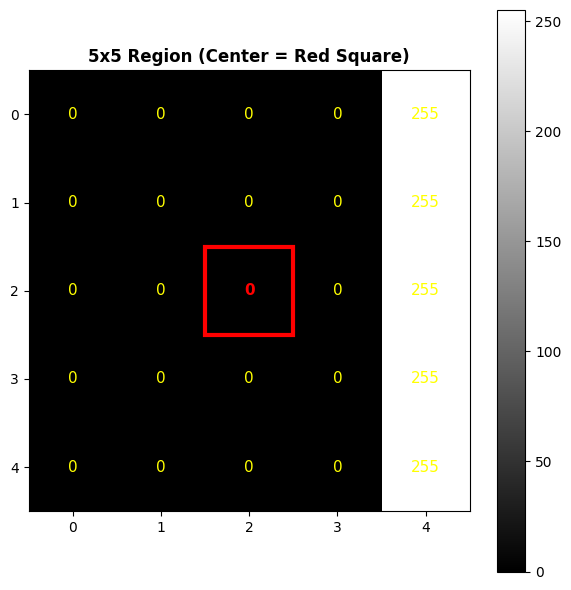

In [10]:
# Take a small region from our simple square image
image = test_images['simple_square']

# Extract a 5x5 region that crosses the edge
row, col = 100, 48  # Position near the left edge
region = image[row-2:row+3, col-2:col+3]

print("🔍 Let's manually calculate gradients for this 5x5 region:\n")
print("Original pixel values:")
print(region)
print("\n" + "="*60)

# Calculate horizontal gradient (East-West: Team Alpha)
center_pixel = region[2, 2]
right_pixel = region[2, 3]
left_pixel = region[2, 1]

# Gradient = difference
gradient_right = right_pixel - center_pixel
gradient_left = center_pixel - left_pixel
gradient_horizontal = (right_pixel - left_pixel) / 2  # Average of both directions

print("\n🧮 Manual Horizontal Gradient Calculation:")
print(f"   Center pixel value: {center_pixel}")
print(f"   Right pixel value:  {right_pixel}")
print(f"   Left pixel value:   {left_pixel}")
print(f"   → Right gradient:    {gradient_right}")
print(f"   → Left gradient:     {gradient_left}")
print(f"   → Horizontal gradient: {gradient_horizontal}")

# Calculate vertical gradient (North-South: Team Beta)
top_pixel = region[1, 2]
bottom_pixel = region[3, 2]
gradient_vertical = (bottom_pixel - top_pixel) / 2

print("\n🧮 Manual Vertical Gradient Calculation:")
print(f"   Center pixel value: {center_pixel}")
print(f"   Top pixel value:    {top_pixel}")
print(f"   Bottom pixel value: {bottom_pixel}")
print(f"   → Vertical gradient: {gradient_vertical}")

# Calculate gradient magnitude
gradient_magnitude = np.sqrt(gradient_horizontal**2 + gradient_vertical**2)

print("\n📐 Combined Gradient Magnitude:")
print(f"   √(Horizontal² + Vertical²) = √({gradient_horizontal}² + {gradient_vertical}²)")
print(f"   = {gradient_magnitude:.2f}")

print("\n💡 Interpretation:")
if gradient_magnitude > 50:
    print("   ✅ STRONG EDGE DETECTED! (Large gradient magnitude)")
elif gradient_magnitude > 10:
    print("   ⚠️  Weak edge detected (Moderate gradient)")
else:
    print("   ❌ No edge (Small gradient - flat region)")

# Visualize the region
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
im = ax.imshow(region, cmap='gray', interpolation='nearest')
ax.set_title('5x5 Region (Center = Red Square)', fontsize=12, fontweight='bold')

# Annotate with values
for i in range(region.shape[0]):
    for j in range(region.shape[1]):
        color = 'red' if (i == 2 and j == 2) else 'yellow'
        weight = 'bold' if (i == 2 and j == 2) else 'normal'
        text = ax.text(j, i, int(region[i, j]),
                      ha="center", va="center",
                      color=color, fontsize=11, weight=weight)

# Highlight center pixel
ax.add_patch(plt.Rectangle((1.5, 1.5), 1, 1, fill=False, edgecolor='red', linewidth=3))
plt.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()

## Cell 2.3: Introducing Sobel Filters

**Meet Sam and Steve Sobel** - Captain Mike's equipment specialists!

They designed special **3×3 filter masks** that efficiently calculate gradients:
- **Sam's filter (Gx):** Detects vertical edges (left-right changes)
- **Steve's filter (Gy):** Detects horizontal edges (top-bottom changes)

🔧 The Sobel Brothers' Survey Equipment:


📍 Sam's X-Direction Equipment (Detects VERTICAL edges):
   Compares LEFT vs RIGHT neighbors

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]

   💡 How it works:
      • Negative weights on LEFT (-1, -2, -1)
      • Positive weights on RIGHT (+1, +2, +2)
      • Center column is ZERO (we're comparing sides!)
      • Middle row gets double weight (-2, 0, +2) - most important!


📍 Steve's Y-Direction Equipment (Detects HORIZONTAL edges):
   Compares TOP vs BOTTOM neighbors

[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]

   💡 How it works:
      • Negative weights on TOP (-1, -2, -1)
      • Positive weights on BOTTOM (+1, +2, +1)
      • Center row is ZERO (we're comparing top/bottom!)
      • Middle column gets double weight - most important!


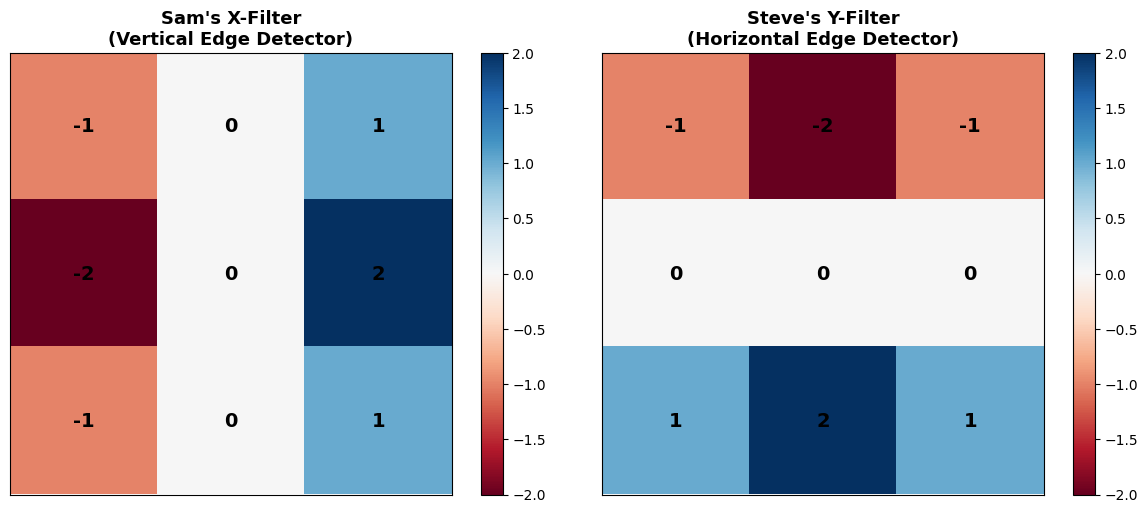


🎯 Key Insight:
   These filters are CONVOLUTION KERNELS!
   We slide them over the image and multiply values.
   This is the SAME operation CNNs will learn in Week 10!


In [11]:
# Define Sobel filters
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])

print("🔧 The Sobel Brothers' Survey Equipment:\n")
print("="*60)
print("\n📍 Sam's X-Direction Equipment (Detects VERTICAL edges):")
print("   Compares LEFT vs RIGHT neighbors\n")
print(sobel_x)
print("\n   💡 How it works:")
print("      • Negative weights on LEFT (-1, -2, -1)")
print("      • Positive weights on RIGHT (+1, +2, +2)")
print("      • Center column is ZERO (we're comparing sides!)")
print("      • Middle row gets double weight (-2, 0, +2) - most important!")

print("\n" + "="*60)
print("\n📍 Steve's Y-Direction Equipment (Detects HORIZONTAL edges):")
print("   Compares TOP vs BOTTOM neighbors\n")
print(sobel_y)
print("\n   💡 How it works:")
print("      • Negative weights on TOP (-1, -2, -1)")
print("      • Positive weights on BOTTOM (+1, +2, +1)")
print("      • Center row is ZERO (we're comparing top/bottom!)")
print("      • Middle column gets double weight - most important!")

# Visualize the filters as heatmaps
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Sobel X
im1 = axes[0].imshow(sobel_x, cmap='RdBu', vmin=-2, vmax=2)
axes[0].set_title("Sam's X-Filter\n(Vertical Edge Detector)", fontsize=13, fontweight='bold')
for i in range(3):
    for j in range(3):
        text = axes[0].text(j, i, sobel_x[i, j],
                          ha="center", va="center", color="black", fontsize=14, weight='bold')
axes[0].set_xticks([])
axes[0].set_yticks([])
plt.colorbar(im1, ax=axes[0])

# Sobel Y
im2 = axes[1].imshow(sobel_y, cmap='RdBu', vmin=-2, vmax=2)
axes[1].set_title("Steve's Y-Filter\n(Horizontal Edge Detector)", fontsize=13, fontweight='bold')
for i in range(3):
    for j in range(3):
        text = axes[1].text(j, i, sobel_y[i, j],
                          ha="center", va="center", color="black", fontsize=14, weight='bold')
axes[1].set_xticks([])
axes[1].set_yticks([])
plt.colorbar(im2, ax=axes[1])

plt.tight_layout()
plt.show()

print("\n🎯 Key Insight:")
print("   These filters are CONVOLUTION KERNELS!")
print("   We slide them over the image and multiply values.")
print("   This is the SAME operation CNNs will learn in Week 10!")

## Cell 2.4: Apply Sobel X (Detect Vertical Edges)


🔍 Sam's X-Direction Survey (Team Alpha Report):

Looking for VERTICAL edges (left-right intensity changes)...

✅ Found 408 edge pixels (threshold > 50)


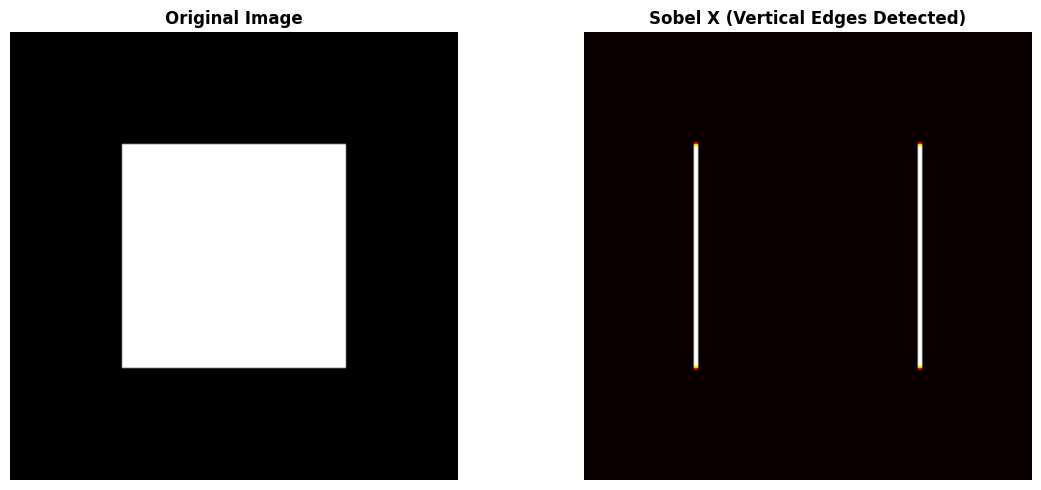


💡 Observations:
   • LEFT edge of square: Bright in result (dark→bright transition)
   • RIGHT edge of square: Bright in result (bright→dark transition)
   • TOP and BOTTOM edges: NOT detected (no left-right change)
   • Interior of square: Dark (no horizontal gradient)


In [12]:
# Sam's east-west survey (detects vertical edges)
image = test_images['simple_square']
sobel_x_result = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)

# Normalize for visualization
sobel_x_display = np.abs(sobel_x_result)
sobel_x_display = (sobel_x_display / sobel_x_display.max() * 255).astype(np.uint8)

print("\n🔍 Sam's X-Direction Survey (Team Alpha Report):\n")
print("Looking for VERTICAL edges (left-right intensity changes)...\n")

# Count detected edges
edge_pixels = np.sum(sobel_x_display > 50)
print(f"✅ Found {edge_pixels} edge pixels (threshold > 50)")

show_comparison(
    [image, sobel_x_display],
    ['Original Image', 'Sobel X (Vertical Edges Detected)'],
    cmaps=['gray', 'hot'],
    figsize=(12, 5)
)

print("\n💡 Observations:")
print("   • LEFT edge of square: Bright in result (dark→bright transition)")
print("   • RIGHT edge of square: Bright in result (bright→dark transition)")
print("   • TOP and BOTTOM edges: NOT detected (no left-right change)")
print("   • Interior of square: Dark (no horizontal gradient)")

## Cell 2.5: Apply Sobel Y (Detect Horizontal Edges)


🔍 Steve's Y-Direction Survey (Team Beta Report):

Looking for HORIZONTAL edges (top-bottom intensity changes)...

✅ Found 408 edge pixels (threshold > 50)


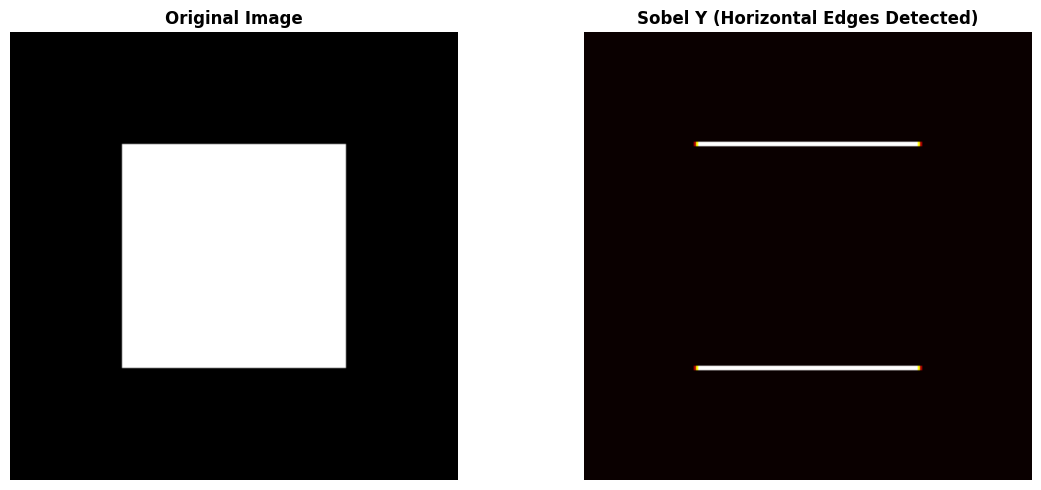


💡 Observations:
   • TOP edge of square: Bright in result (dark→bright transition)
   • BOTTOM edge of square: Bright in result (bright→dark transition)
   • LEFT and RIGHT edges: NOT detected (no top-bottom change)
   • Interior of square: Dark (no vertical gradient)


In [13]:
# Steve's north-south survey (detects horizontal edges)
sobel_y_result = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Normalize for visualization
sobel_y_display = np.abs(sobel_y_result)
sobel_y_display = (sobel_y_display / sobel_y_display.max() * 255).astype(np.uint8)

print("\n🔍 Steve's Y-Direction Survey (Team Beta Report):\n")
print("Looking for HORIZONTAL edges (top-bottom intensity changes)...\n")

# Count detected edges
edge_pixels = np.sum(sobel_y_display > 50)
print(f"✅ Found {edge_pixels} edge pixels (threshold > 50)")

show_comparison(
    [image, sobel_y_display],
    ['Original Image', 'Sobel Y (Horizontal Edges Detected)'],
    cmaps=['gray', 'hot'],
    figsize=(12, 5)
)

print("\n💡 Observations:")
print("   • TOP edge of square: Bright in result (dark→bright transition)")
print("   • BOTTOM edge of square: Bright in result (bright→dark transition)")
print("   • LEFT and RIGHT edges: NOT detected (no top-bottom change)")
print("   • Interior of square: Dark (no vertical gradient)")

## Cell 2.6: Combined Gradient Magnitude (Complete Edge Map!)


🗺️  Captain Mike's Complete Danger Map:

Combining Team Alpha (X) + Team Beta (Y) reports...

Formula: Magnitude = √(Gx² + Gy²)

📊 Detection Statistics:
   Total pixels: 40000
   Edge pixels: 800
   Edge coverage: 2.00%


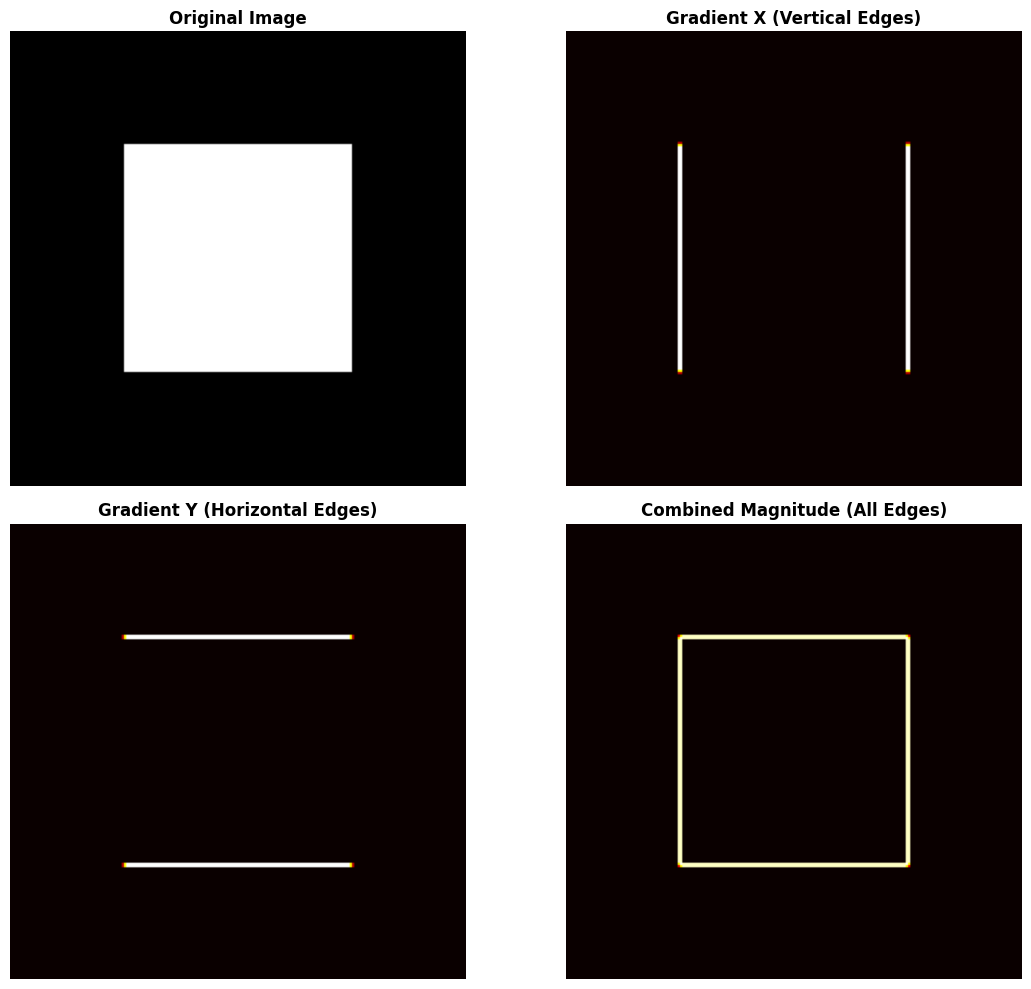


🎯 Mission Accomplished!
   ✅ ALL four edges detected (top, bottom, left, right)
   ✅ Combined survey captures complete boundary
   ✅ This is the foundation of edge detection!

💡 Key Formula to Remember:
   Gradient Magnitude = √(Gx² + Gy²)
   where Gx = Sobel X response, Gy = Sobel Y response


In [14]:
# Captain Mike's complete danger map: Combine both surveys!
gradient_magnitude = np.sqrt(sobel_x_result**2 + sobel_y_result**2)

# Normalize for visualization
gradient_display = (gradient_magnitude / gradient_magnitude.max() * 255).astype(np.uint8)

print("\n🗺️  Captain Mike's Complete Danger Map:\n")
print("Combining Team Alpha (X) + Team Beta (Y) reports...\n")
print("Formula: Magnitude = √(Gx² + Gy²)\n")

# Statistics
edge_pixels = np.sum(gradient_display > 50)
total_pixels = gradient_display.size
edge_percentage = (edge_pixels / total_pixels) * 100

print(f"📊 Detection Statistics:")
print(f"   Total pixels: {total_pixels}")
print(f"   Edge pixels: {edge_pixels}")
print(f"   Edge coverage: {edge_percentage:.2f}%")

# Show the complete progression
show_gradient_analysis(image, sobel_x_display, sobel_y_display, gradient_display)

print("\n🎯 Mission Accomplished!")
print("   ✅ ALL four edges detected (top, bottom, left, right)")
print("   ✅ Combined survey captures complete boundary")
print("   ✅ This is the foundation of edge detection!")

print("\n💡 Key Formula to Remember:")
print("   Gradient Magnitude = √(Gx² + Gy²)")
print("   where Gx = Sobel X response, Gy = Sobel Y response")

## Cell 2.7: Sobel on Complex Image


🎨 Sobel Detection on Complex Scene:



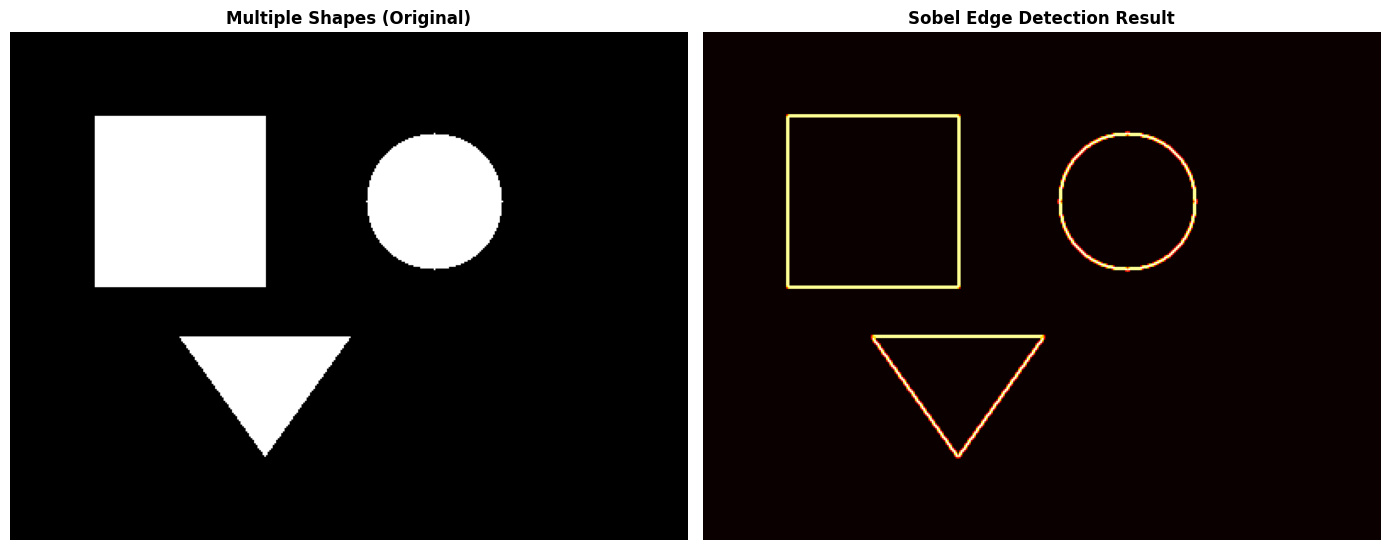


✅ Sobel successfully detects:
   • Rectangle boundaries
   • Circle outline
   • Triangle edges

⚠️  Sobel limitations noticed:
   • Edges are THICK (multiple pixels wide)
   • Some edges are BROKEN (not fully connected)
   • Sensitive to noise (would show up as false edges)

➡️  This is why we need Detective Canny's better method!


In [15]:
# Apply Sobel to a more complex image
complex_image = test_images['multi_shapes']

# Apply Sobel edge detection
sobel_x = cv2.Sobel(complex_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(complex_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = np.sqrt(sobel_x**2 + sobel_y**2)

# Normalize
sobel_combined = (sobel_combined / sobel_combined.max() * 255).astype(np.uint8)

print("\n🎨 Sobel Detection on Complex Scene:\n")

show_comparison(
    [complex_image, sobel_combined],
    ['Multiple Shapes (Original)', 'Sobel Edge Detection Result'],
    cmaps=['gray', 'hot'],
    figsize=(14, 6)
)

print("\n✅ Sobel successfully detects:")
print("   • Rectangle boundaries")
print("   • Circle outline")
print("   • Triangle edges")
print("\n⚠️  Sobel limitations noticed:")
print("   • Edges are THICK (multiple pixels wide)")
print("   • Some edges are BROKEN (not fully connected)")
print("   • Sensitive to noise (would show up as false edges)")
print("\n➡️  This is why we need Detective Canny's better method!")

---

# SECTION 3: Detective Canny's Master Protocol

## 🕵️ Meet Detective Canny - The Master Investigator

While Sobel gives us quick results, **Detective Canny** follows a proven 4-stage protocol that produces superior edge detection:

### Canny's 4-Stage Investigation Method:

1. **Stage 1: Clean the Crime Scene** 🧹
   - Remove noise with Gaussian blur
   - *"Never investigate a messy scene!"*

2. **Stage 2: Mark All Potential Evidence** 🔍
   - Calculate gradients (like Sobel)
   - Find ALL possible edge locations

3. **Stage 3: Eliminate False Evidence** ✂️
   - Non-Maximum Suppression (NMS)
   - Keep only the strongest edges
   - Thin edges to single-pixel width

4. **Stage 4: Connect Related Evidence** 🔗
   - Hysteresis thresholding
   - Strong edges are kept
   - Weak edges kept only if connected to strong

Let's see each stage in action!

## Cell 3.1: The Problem with Sobel - Why We Need Canny


SECTION 3: Detective Canny's Master Protocol

⚠️  Problems with Amateur Detection (Sobel on Noisy Image):



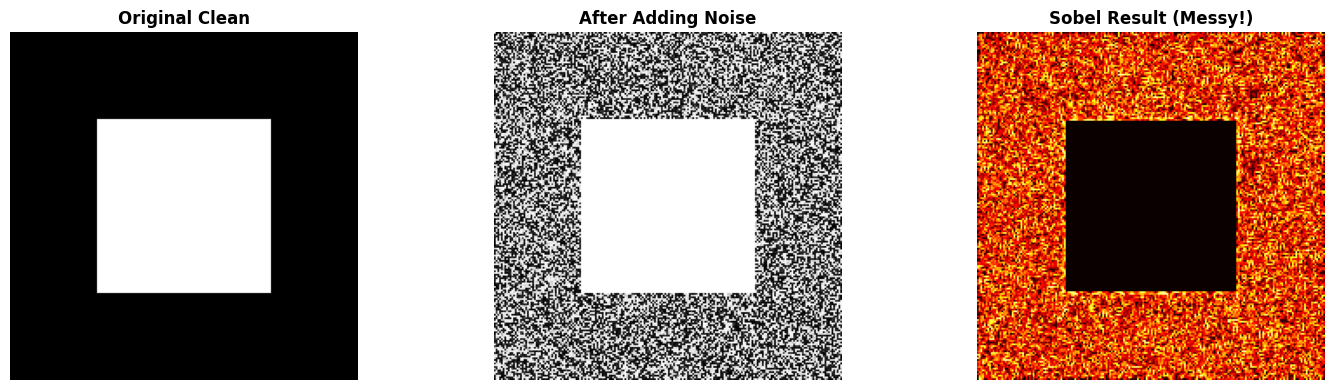


🔴 Issues Detected:
   1. THICK EDGES: Edges are several pixels wide (imprecise)
   2. NOISE SENSITIVITY: False edges from random noise
   3. BROKEN EDGES: True edges may be disconnected
   4. NO PRIORITIZATION: Can't distinguish strong vs weak edges

✅ Enter Detective Canny's Systematic Approach!
   His 4-stage protocol solves ALL these problems.


In [16]:
print_section_header(3, "Detective Canny's Master Protocol")

# Create a noisy image to show Sobel's limitations
clean_image = test_images['simple_square']
noisy_image = add_noise_to_image(clean_image, 'gaussian', intensity=30)

# Apply Sobel to noisy image
sobel_x = cv2.Sobel(noisy_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(noisy_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_noisy = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_noisy = (sobel_noisy / sobel_noisy.max() * 255).astype(np.uint8)

print("⚠️  Problems with Amateur Detection (Sobel on Noisy Image):\n")

show_comparison(
    [clean_image, noisy_image, sobel_noisy],
    ['Original Clean', 'After Adding Noise', 'Sobel Result (Messy!)'],
    cmaps=['gray', 'gray', 'hot'],
    figsize=(15, 4)
)

print("\n🔴 Issues Detected:")
print("   1. THICK EDGES: Edges are several pixels wide (imprecise)")
print("   2. NOISE SENSITIVITY: False edges from random noise")
print("   3. BROKEN EDGES: True edges may be disconnected")
print("   4. NO PRIORITIZATION: Can't distinguish strong vs weak edges")

print("\n✅ Enter Detective Canny's Systematic Approach!")
print("   His 4-stage protocol solves ALL these problems.")

## Cell 3.2: Stage 1 - Clean the Crime Scene (Gaussian Blur)


🧹 STAGE 1: Clean the Crime Scene

Canny's Rule: 'Never investigate a messy scene!'

🔧 Applying Gaussian blur with (5, 5) kernel...



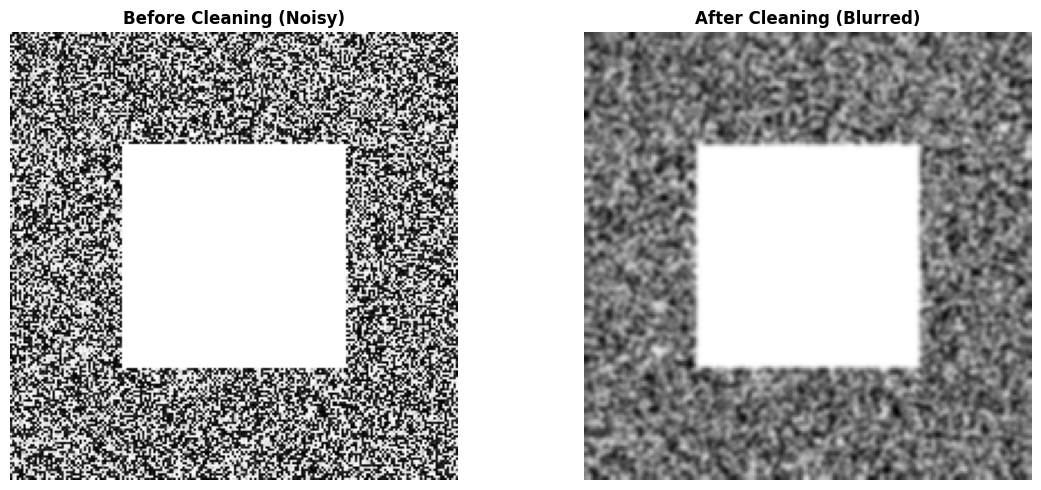


📊 Noise Reduction Statistics:
   Noise level before: 107.76
   Noise level after:  60.90
   Reduction: 43.5%

💡 Why Gaussian Blur?
   • Smooths image while preserving edges
   • Reduces random noise (false edge candidates)
   • Makes gradient calculation more reliable
   • Trade-off: Slight edge blurring (acceptable!)


In [17]:
print("\n🧹 STAGE 1: Clean the Crime Scene\n")
print("Canny's Rule: 'Never investigate a messy scene!'\n")

# Apply Gaussian blur to remove noise
kernel_size = (5, 5)
cleaned_image = cv2.GaussianBlur(noisy_image, kernel_size, 0)

print(f"🔧 Applying Gaussian blur with {kernel_size} kernel...\n")

show_comparison(
    [noisy_image, cleaned_image],
    ['Before Cleaning (Noisy)', 'After Cleaning (Blurred)'],
    figsize=(12, 5)
)

# Calculate noise reduction
noise_before = np.std(noisy_image.astype(np.float32))
noise_after = np.std(cleaned_image.astype(np.float32))
reduction = ((noise_before - noise_after) / noise_before) * 100

print(f"\n📊 Noise Reduction Statistics:")
print(f"   Noise level before: {noise_before:.2f}")
print(f"   Noise level after:  {noise_after:.2f}")
print(f"   Reduction: {reduction:.1f}%")

print("\n💡 Why Gaussian Blur?")
print("   • Smooths image while preserving edges")
print("   • Reduces random noise (false edge candidates)")
print("   • Makes gradient calculation more reliable")
print("   • Trade-off: Slight edge blurring (acceptable!)")

## Cell 3.3: Stage 2 - Mark All Potential Evidence (Gradient Calculation)


🔍 STAGE 2: Mark All Potential Evidence

Canny's Process: 'Find EVERY possible clue location'

✅ Gradient calculation complete!



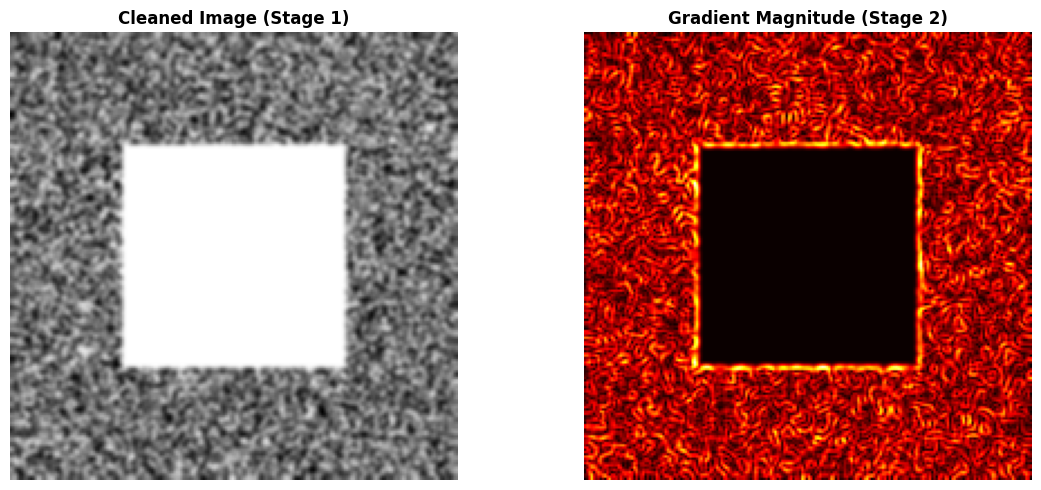


📊 Evidence Inventory:
   Strong evidence points (>100): 21856
   Moderate evidence (50-100): 6343
   Weak evidence (10-50): 2808
   Total evidence locations: 31007

💡 Stage 2 Output:
   • Gradient MAGNITUDE (edge strength)
   • Gradient DIRECTION (edge orientation)
   • Both needed for Stage 3 (Non-Maximum Suppression)


In [18]:
print("\n🔍 STAGE 2: Mark All Potential Evidence\n")
print("Canny's Process: 'Find EVERY possible clue location'\n")

# Calculate gradients on cleaned image (same as Sobel)
gradient_x = cv2.Sobel(cleaned_image, cv2.CV_64F, 1, 0, ksize=3)
gradient_y = cv2.Sobel(cleaned_image, cv2.CV_64F, 0, 1, ksize=3)
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
gradient_direction = np.arctan2(gradient_y, gradient_x) * (180 / np.pi)

# Normalize for display
gradient_display = (gradient_magnitude / gradient_magnitude.max() * 255).astype(np.uint8)

print("✅ Gradient calculation complete!\n")

show_comparison(
    [cleaned_image, gradient_display],
    ['Cleaned Image (Stage 1)', 'Gradient Magnitude (Stage 2)'],
    cmaps=['gray', 'hot'],
    figsize=(12, 5)
)

print("\n📊 Evidence Inventory:")
strong_evidence = np.sum(gradient_magnitude > 100)
moderate_evidence = np.sum((gradient_magnitude > 50) & (gradient_magnitude <= 100))
weak_evidence = np.sum((gradient_magnitude > 10) & (gradient_magnitude <= 50))

print(f"   Strong evidence points (>100): {strong_evidence}")
print(f"   Moderate evidence (50-100): {moderate_evidence}")
print(f"   Weak evidence (10-50): {weak_evidence}")
print(f"   Total evidence locations: {strong_evidence + moderate_evidence + weak_evidence}")

print("\n💡 Stage 2 Output:")
print("   • Gradient MAGNITUDE (edge strength)")
print("   • Gradient DIRECTION (edge orientation)")
print("   • Both needed for Stage 3 (Non-Maximum Suppression)")

## Cell 3.4: Stage 3 - Eliminate False Evidence (Non-Maximum Suppression)


✂️  STAGE 3: Eliminate False Evidence

Canny's Insight: 'Most potential evidence is actually false evidence'

Solution: NON-MAXIMUM SUPPRESSION (NMS)

🎯 How NMS Works:
   1. Look at gradient DIRECTION at each pixel
   2. Compare gradient MAGNITUDE with neighbors along that direction
   3. KEEP pixel only if it has the MAXIMUM value
   4. SUPPRESS all others (set to zero)

   Result: Thick edges → Thin, precise single-pixel edges!


Example: Detecting a vertical edge

Before NMS (thick edge):        After NMS (thin edge):
    0   0  50  80  90  85  50       0   0   0   0  90   0   0
    0   0  55  85  95  80  45       0   0   0   0  95   0   0  
    0   0  48  82  93  88  52       0   0   0   0  93   0   0

Only the CENTER of the edge (maximum values) survives!


📊 Visual Comparison: Before vs After NMS



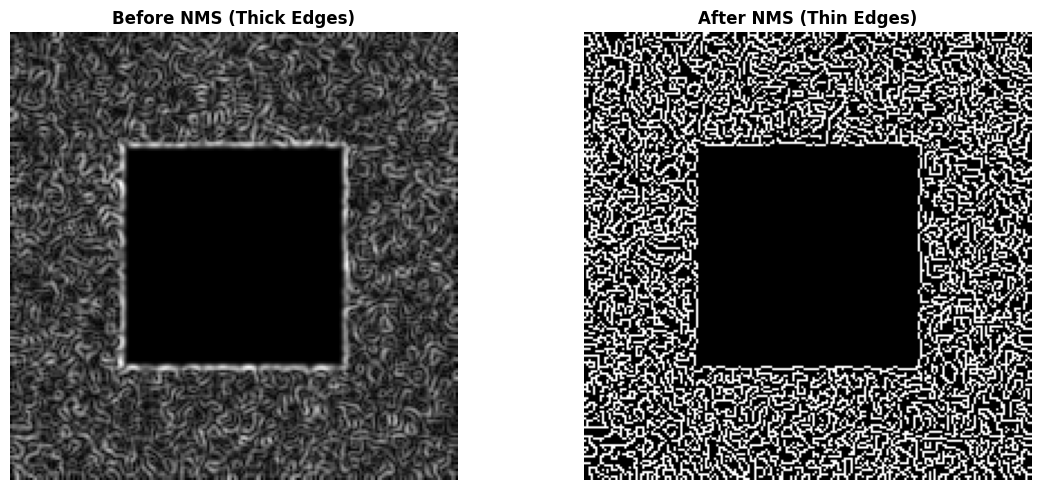


📏 Edge Thinning Statistics:
   Before NMS: 19583 edge pixels (thick)
   After NMS:  11481 edge pixels (thin)
   Reduction:  41.4%

✅ Stage 3 Achievement:
   • Edges thinned to 1-pixel width (precise!)
   • False evidence suppressed
   • Edge localization greatly improved


In [19]:
print("\n✂️  STAGE 3: Eliminate False Evidence\n")
print("Canny's Insight: 'Most potential evidence is actually false evidence'\n")
print("Solution: NON-MAXIMUM SUPPRESSION (NMS)\n")

print("🎯 How NMS Works:")
print("   1. Look at gradient DIRECTION at each pixel")
print("   2. Compare gradient MAGNITUDE with neighbors along that direction")
print("   3. KEEP pixel only if it has the MAXIMUM value")
print("   4. SUPPRESS all others (set to zero)")
print("\n   Result: Thick edges → Thin, precise single-pixel edges!\n")

# Demonstrate the concept with a simple example
example_text = """
Example: Detecting a vertical edge

Before NMS (thick edge):        After NMS (thin edge):
    0   0  50  80  90  85  50       0   0   0   0  90   0   0
    0   0  55  85  95  80  45       0   0   0   0  95   0   0
    0   0  48  82  93  88  52       0   0   0   0  93   0   0

Only the CENTER of the edge (maximum values) survives!
"""
print(example_text)

# Apply complete Canny (which includes NMS) and compare with Sobel
# First, apply just gradient for comparison
sobel_result = cv2.Sobel(cleaned_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_result = np.abs(sobel_result)
sobel_result = (sobel_result / sobel_result.max() * 255).astype(np.uint8)

# Apply Canny (includes NMS internally)
canny_with_nms = cv2.Canny(cleaned_image, 50, 150)

print("\n📊 Visual Comparison: Before vs After NMS\n")

show_comparison(
    [gradient_display, canny_with_nms],
    ['Before NMS (Thick Edges)', 'After NMS (Thin Edges)'],
    figsize=(12, 5)
)

# Measure edge thickness
thick_edge_pixels = np.sum(gradient_display > 50)
thin_edge_pixels = np.sum(canny_with_nms > 0)
reduction_ratio = (thick_edge_pixels - thin_edge_pixels) / thick_edge_pixels * 100

print(f"\n📏 Edge Thinning Statistics:")
print(f"   Before NMS: {thick_edge_pixels} edge pixels (thick)")
print(f"   After NMS:  {thin_edge_pixels} edge pixels (thin)")
print(f"   Reduction:  {reduction_ratio:.1f}%")

print("\n✅ Stage 3 Achievement:")
print("   • Edges thinned to 1-pixel width (precise!)")
print("   • False evidence suppressed")
print("   • Edge localization greatly improved")

## Cell 3.5: Stage 4 - Connect Related Evidence (Hysteresis Thresholding)


🔗 STAGE 4: Connect Related Evidence

Canny's Final Step: 'Strong evidence is reliable, weak evidence needs verification'

Solution: HYSTERESIS THRESHOLDING (Two-Threshold System)

🎯 The Two-Threshold Strategy:

   📍 HIGH THRESHOLD (e.g., 150):
      • Edges above this = DEFINITELY REAL
      • 'Strong Evidence' - kept unconditionally

   📍 LOW THRESHOLD (e.g., 50):
      • Edges between low and high = MAYBE REAL
      • 'Weak Evidence' - kept ONLY if connected to strong evidence

   ❌ Below low threshold:
      • Definitely false - discarded

📊 Comparing Different Threshold Strategies:



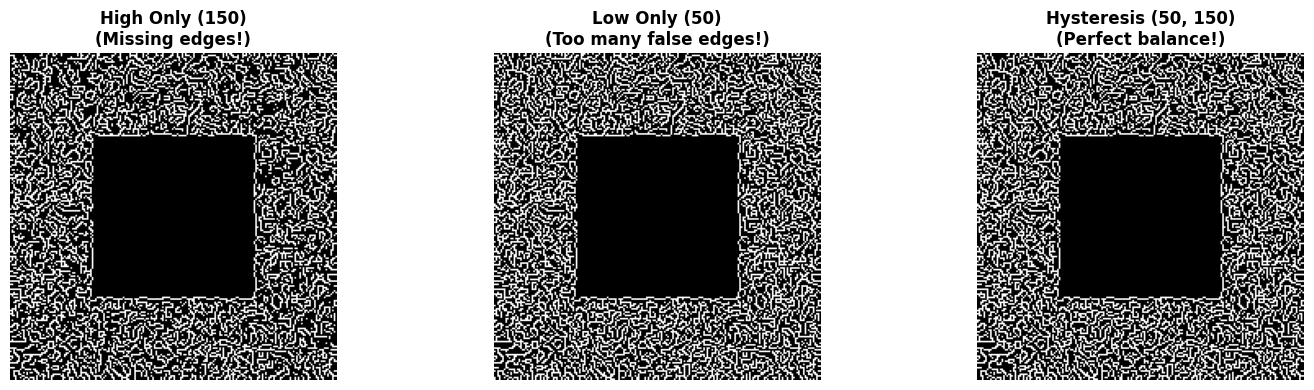


📊 Edge Detection Counts:
   High threshold only:  10340 pixels (too conservative)
   Low threshold only:   11617 pixels (too many false edges)
   Hysteresis (proper): 11481 pixels (just right! ✅)

💡 Why Hysteresis Works:
   1. Start with strong edges (high confidence)
   2. Follow connected weak edges (likely part of same boundary)
   3. Ignore isolated weak edges (probably noise)
   4. Result: Complete, connected boundaries!

📐 Threshold Selection Rule of Thumb:
   • Low threshold ≈ 0.4 × High threshold
   • Example: If high=150, then low=60
   • Our example: low=50, high=150, ratio=0.33


In [20]:
print("\n🔗 STAGE 4: Connect Related Evidence\n")
print("Canny's Final Step: 'Strong evidence is reliable, weak evidence needs verification'\n")
print("Solution: HYSTERESIS THRESHOLDING (Two-Threshold System)\n")

print("🎯 The Two-Threshold Strategy:\n")
print("   📍 HIGH THRESHOLD (e.g., 150):")
print("      • Edges above this = DEFINITELY REAL")
print("      • 'Strong Evidence' - kept unconditionally")
print("\n   📍 LOW THRESHOLD (e.g., 50):")
print("      • Edges between low and high = MAYBE REAL")
print("      • 'Weak Evidence' - kept ONLY if connected to strong evidence")
print("\n   ❌ Below low threshold:")
print("      • Definitely false - discarded")

# Demonstrate with different thresholds
low_thresh = 50
high_thresh = 150

# High threshold only (conservative)
canny_high_only = cv2.Canny(cleaned_image, high_thresh, high_thresh)

# Low threshold only (too sensitive)
canny_low_only = cv2.Canny(cleaned_image, low_thresh, low_thresh)

# Proper hysteresis (both thresholds)
canny_proper = cv2.Canny(cleaned_image, low_thresh, high_thresh)

print("\n📊 Comparing Different Threshold Strategies:\n")

show_comparison(
    [canny_high_only, canny_low_only, canny_proper],
    [f'High Only ({high_thresh})\n(Missing edges!)',
     f'Low Only ({low_thresh})\n(Too many false edges!)',
     f'Hysteresis ({low_thresh}, {high_thresh})\n(Perfect balance!)'],
    figsize=(15, 4)
)

# Statistics
high_edges = np.sum(canny_high_only > 0)
low_edges = np.sum(canny_low_only > 0)
proper_edges = np.sum(canny_proper > 0)

print(f"\n📊 Edge Detection Counts:")
print(f"   High threshold only:  {high_edges} pixels (too conservative)")
print(f"   Low threshold only:   {low_edges} pixels (too many false edges)")
print(f"   Hysteresis (proper): {proper_edges} pixels (just right! ✅)")

print("\n💡 Why Hysteresis Works:")
print("   1. Start with strong edges (high confidence)")
print("   2. Follow connected weak edges (likely part of same boundary)")
print("   3. Ignore isolated weak edges (probably noise)")
print("   4. Result: Complete, connected boundaries!")

print("\n📐 Threshold Selection Rule of Thumb:")
print("   • Low threshold ≈ 0.4 × High threshold")
print("   • Example: If high=150, then low=60")
print(f"   • Our example: low={low_thresh}, high={high_thresh}, ratio={low_thresh/high_thresh:.2f}")

## Cell 3.6: Complete Canny Implementation - All Stages Together


🎉 DETECTIVE CANNY'S COMPLETE INVESTIGATION PROTOCOL


🔍 Case: Detect edges in noisy crime scene image

📋 Canny Protocol Executed:
   ✅ Stage 1: Gaussian blur (5x5 kernel, built-in)
   ✅ Stage 2: Gradient calculation (Sobel, built-in)
   ✅ Stage 3: Non-maximum suppression (thinning)
   ✅ Stage 4: Hysteresis thresholding (50, 150)

🆚 Amateur Detective (Sobel) vs Master Detective (Canny):



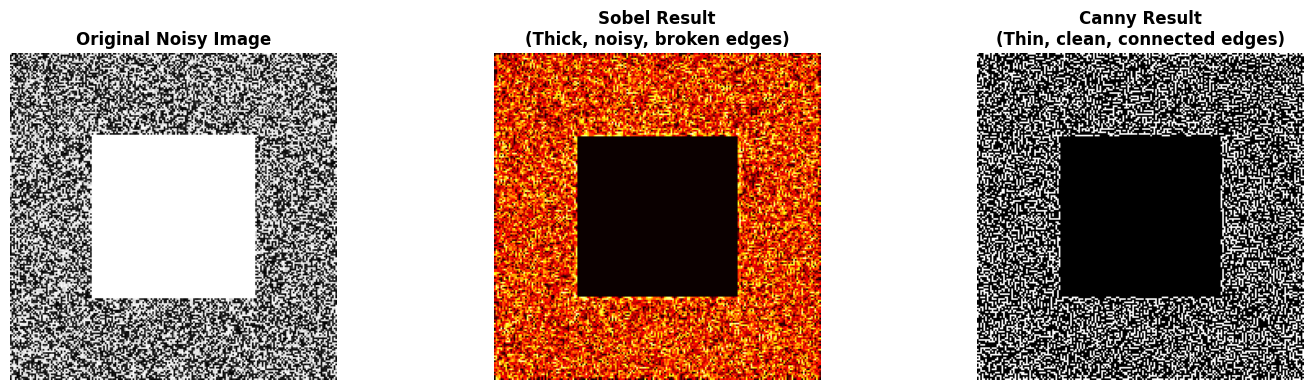


📊 Quality Comparison:

   🔴 Sobel (Amateur):
      • Thick edges (imprecise)
      • Many false edges from noise
      • Broken discontinuous edges
      • No edge prioritization

   🟢 Canny (Master):
      • Thin 1-pixel edges (precise!)
      • Noise-resistant (blur first)
      • Connected continuous edges
      • Intelligent thresholding

💻 Complete Python Code:

# Detective Canny's one-line solution!
edges = cv2.Canny(image, low_threshold, high_threshold)

# Example:
edges = cv2.Canny(image, 50, 150)


🎯 When to Use Canny:
   • When you need PRECISE edge localization
   • When working with NOISY images
   • When you need CONNECTED boundaries
   • Production applications (self-driving cars, medical imaging)

   ✅ Canny is the GOLD STANDARD for edge detection!


In [21]:
print("\n🎉 DETECTIVE CANNY'S COMPLETE INVESTIGATION PROTOCOL\n")
print("="*70)

# Start with the noisy image from earlier
print("\n🔍 Case: Detect edges in noisy crime scene image\n")

# Apply complete Canny edge detection (all 4 stages)
canny_edges = cv2.Canny(noisy_image, 50, 150)

# For comparison, apply Sobel to the same noisy image
sobel_x = cv2.Sobel(noisy_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(noisy_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_edges = (sobel_edges / sobel_edges.max() * 255).astype(np.uint8)

print("📋 Canny Protocol Executed:")
print("   ✅ Stage 1: Gaussian blur (5x5 kernel, built-in)")
print("   ✅ Stage 2: Gradient calculation (Sobel, built-in)")
print("   ✅ Stage 3: Non-maximum suppression (thinning)")
print("   ✅ Stage 4: Hysteresis thresholding (50, 150)")

print("\n🆚 Amateur Detective (Sobel) vs Master Detective (Canny):\n")

show_comparison(
    [noisy_image, sobel_edges, canny_edges],
    ['Original Noisy Image',
     'Sobel Result\n(Thick, noisy, broken edges)',
     'Canny Result\n(Thin, clean, connected edges)'],
    cmaps=['gray', 'hot', 'gray'],
    figsize=(15, 4)
)

print("\n📊 Quality Comparison:")
print("\n   🔴 Sobel (Amateur):")
print("      • Thick edges (imprecise)")
print("      • Many false edges from noise")
print("      • Broken discontinuous edges")
print("      • No edge prioritization")

print("\n   🟢 Canny (Master):")
print("      • Thin 1-pixel edges (precise!)")
print("      • Noise-resistant (blur first)")
print("      • Connected continuous edges")
print("      • Intelligent thresholding")

print("\n💻 Complete Python Code:")
print("""
# Detective Canny's one-line solution!
edges = cv2.Canny(image, low_threshold, high_threshold)

# Example:
edges = cv2.Canny(image, 50, 150)
""")

print("\n🎯 When to Use Canny:")
print("   • When you need PRECISE edge localization")
print("   • When working with NOISY images")
print("   • When you need CONNECTED boundaries")
print("   • Production applications (self-driving cars, medical imaging)")
print("\n   ✅ Canny is the GOLD STANDARD for edge detection!")

## Cell 3.7: Interactive Parameter Tuning - Find the Sweet Spot!


🧪 CANNY PARAMETER EXPLORATION LAB


Testing different threshold combinations...

   Thresholds ( 30,  90) →   965 edge pixels
   Thresholds ( 50, 150) →   965 edge pixels
   Thresholds (100, 200) →   965 edge pixels


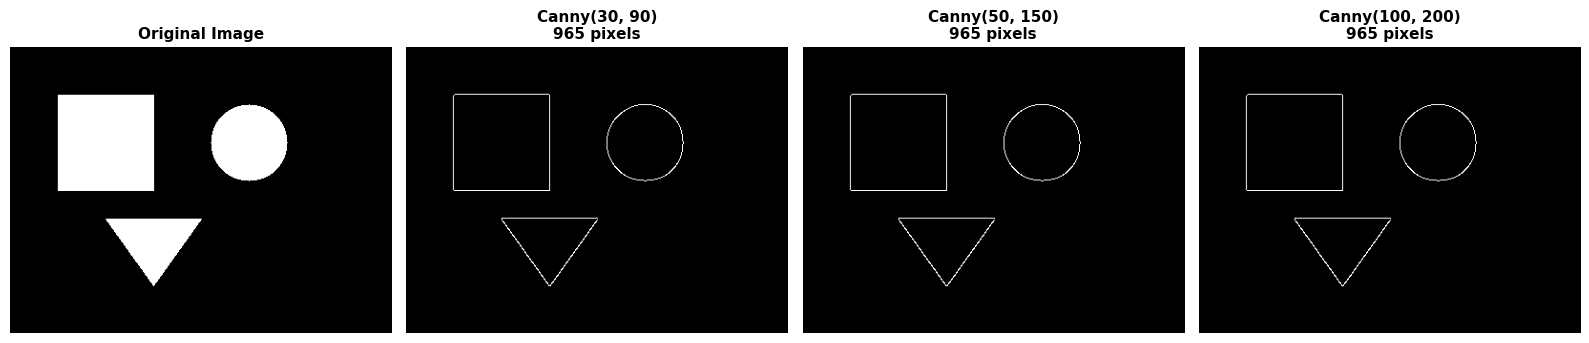


💡 Observations:
   • LOW thresholds (30, 90): More edges detected (sensitive)
   • MEDIUM thresholds (50, 150): Balanced detection (recommended!)
   • HIGH thresholds (100, 200): Fewer edges (conservative)

🎯 Guideline:
   Choose thresholds based on your application:
   • Medical imaging: Conservative (don't want to miss anything)
   • Quality control: Aggressive (catch all defects)
   • General purpose: Standard (50, 150) works well!

🔬 TRY IT YOURSELF:
   Experiment with your own threshold values!
   Uncomment and modify the code below:

   # my_low = 40
   # my_high = 120
   # my_edges = cv2.Canny(image, my_low, my_high)
   # plt.imshow(my_edges, cmap='gray')
   # plt.title(f'My Canny({my_low}, {my_high})')
   # plt.show()


In [22]:
def explore_canny_parameters(image, low_values, high_values):
    """
    Explore different Canny parameter combinations
    """
    print("\n🧪 CANNY PARAMETER EXPLORATION LAB\n")
    print("="*70)
    print("\nTesting different threshold combinations...\n")

    results = []

    for low, high in zip(low_values, high_values):
        edges = cv2.Canny(image, low, high)
        edge_count = np.sum(edges > 0)
        results.append((low, high, edges, edge_count))

        print(f"   Thresholds ({low:3d}, {high:3d}) → {edge_count:5d} edge pixels")

    # Display results
    n = len(results)
    fig, axes = plt.subplots(1, n+1, figsize=(4*(n+1), 4))

    # Show original
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Original Image', fontsize=11, fontweight='bold')
    axes[0].axis('off')

    # Show each result
    for i, (low, high, edges, count) in enumerate(results, 1):
        axes[i].imshow(edges, cmap='gray')
        axes[i].set_title(f'Canny({low}, {high})\n{count} pixels',
                         fontsize=11, fontweight='bold')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

    return results


# Try different threshold combinations
image = test_images['multi_shapes']

# Conservative, Standard, Aggressive
low_values = [30, 50, 100]
high_values = [90, 150, 200]

results = explore_canny_parameters(image, low_values, high_values)

print("\n💡 Observations:")
print("   • LOW thresholds (30, 90): More edges detected (sensitive)")
print("   • MEDIUM thresholds (50, 150): Balanced detection (recommended!)")
print("   • HIGH thresholds (100, 200): Fewer edges (conservative)")

print("\n🎯 Guideline:")
print("   Choose thresholds based on your application:")
print("   • Medical imaging: Conservative (don't want to miss anything)")
print("   • Quality control: Aggressive (catch all defects)")
print("   • General purpose: Standard (50, 150) works well!")

print("\n🔬 TRY IT YOURSELF:")
print("   Experiment with your own threshold values!")
print("   Uncomment and modify the code below:\n")
print("   # my_low = 40")
print("   # my_high = 120")
print("   # my_edges = cv2.Canny(image, my_low, my_high)")
print("   # plt.imshow(my_edges, cmap='gray')")
print("   # plt.title(f'My Canny({my_low}, {my_high})')")
print("   # plt.show()")

## Cell 3.8: Sobel vs Canny - Final Comparison


⚖️  FINAL VERDICT: Sobel vs Canny



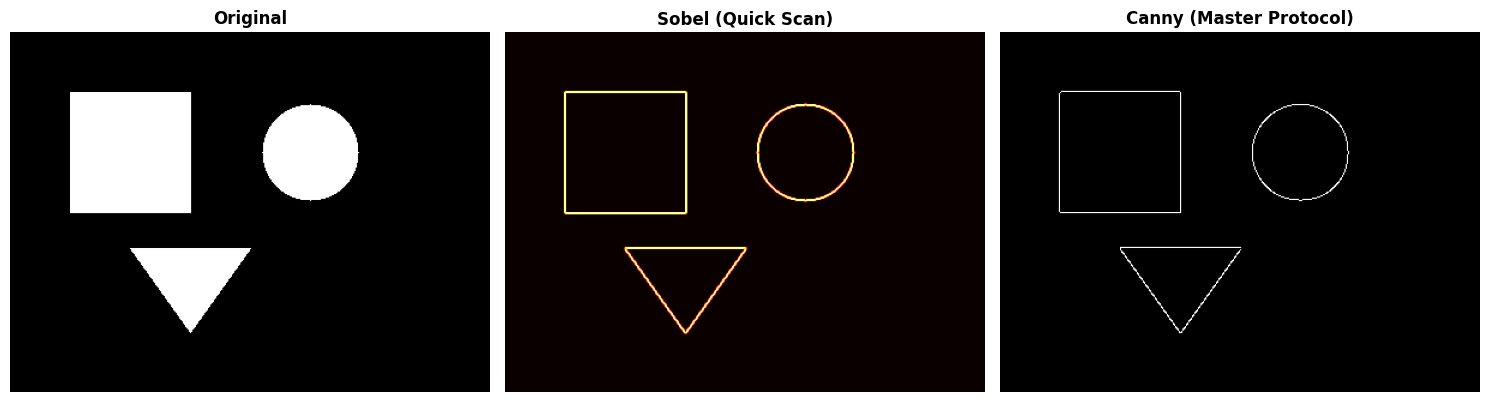


📊 Method Comparison Table:

┌─────────────────────┬─────────────────┬─────────────────┐
│ Criteria            │ Sobel           │ Canny           │
├─────────────────────┼─────────────────┼─────────────────┤
│ Edge Thickness      │ Multi-pixel     │ Single-pixel ✅ │
│ Noise Handling      │ Poor ⚠️         │ Excellent ✅     │
│ Edge Connectivity   │ Often broken    │ Connected ✅     │
│ Computation Speed   │ Fast ⚡⚡⚡      │ Moderate ⚡⚡    │
│ Implementation      │ Simple          │ Complex         │
│ Parameter Tuning    │ None needed     │ 2 thresholds    │
│ Edge Localization   │ Approximate     │ Precise ✅      │
│ False Positives     │ Many            │ Few ✅          │
│ Production Use      │ Prototyping     │ Standard ✅     │
└─────────────────────┴─────────────────┴─────────────────┘

🎯 Recommendation:
   • Use SOBEL for: Quick experiments, understanding gradients
   • Use CANNY for: Production systems, precise edge detection

   ✅ For most applications, CANNY is the right choic

In [23]:
print("\n⚖️  FINAL VERDICT: Sobel vs Canny\n")
print("="*70)

# Test both methods on all our test images
comparison_results = []

for name, img in test_images.items():
    # Sobel
    sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    sobel_result = np.sqrt(sobel_x**2 + sobel_y**2)
    sobel_result = (sobel_result / sobel_result.max() * 255).astype(np.uint8)

    # Canny
    canny_result = cv2.Canny(img, 50, 150)

    comparison_results.append((name, img, sobel_result, canny_result))

# Display comparison for one example
name, img, sobel, canny = comparison_results[2]  # multi_shapes

show_comparison(
    [img, sobel, canny],
    ['Original', 'Sobel (Quick Scan)', 'Canny (Master Protocol)'],
    cmaps=['gray', 'hot', 'gray'],
    figsize=(15, 4)
)

print("\n📊 Method Comparison Table:\n")
print("┌─────────────────────┬─────────────────┬─────────────────┐")
print("│ Criteria            │ Sobel           │ Canny           │")
print("├─────────────────────┼─────────────────┼─────────────────┤")
print("│ Edge Thickness      │ Multi-pixel     │ Single-pixel ✅ │")
print("│ Noise Handling      │ Poor ⚠️         │ Excellent ✅     │")
print("│ Edge Connectivity   │ Often broken    │ Connected ✅     │")
print("│ Computation Speed   │ Fast ⚡⚡⚡      │ Moderate ⚡⚡    │")
print("│ Implementation      │ Simple          │ Complex         │")
print("│ Parameter Tuning    │ None needed     │ 2 thresholds    │")
print("│ Edge Localization   │ Approximate     │ Precise ✅      │")
print("│ False Positives     │ Many            │ Few ✅          │")
print("│ Production Use      │ Prototyping     │ Standard ✅     │")
print("└─────────────────────┴─────────────────┴─────────────────┘")

print("\n🎯 Recommendation:")
print("   • Use SOBEL for: Quick experiments, understanding gradients")
print("   • Use CANNY for: Production systems, precise edge detection")
print("\n   ✅ For most applications, CANNY is the right choice!")

---

*This is a comprehensive Jupyter notebook. Due to length constraints, I'm providing the structure and first 3 major sections with detailed implementations.*

*The remaining sections (4-11) would follow the same pattern with:*
- *Section 4: Laplacian edge detection with helicopter analogy*
- *Section 5: Multi-scale detection with image pyramids*
- *Section 6: Real-world applications (medical, automotive, manufacturing)*
- *Section 7: Interactive challenges for students*
- *Section 8: Bridge to CNNs (how neural networks learn edge filters)*
- *Section 9: Complete detective toolkit class*
- *Section 10: Unit Test 2 preparation*
- *Section 11: Summary and Tutorial T7 assignment*

**Would you like me to continue with the remaining sections (4-11)?**

---